In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Colormap for time
import numpy as np
from datetime import datetime
import os



#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Thermal_Soft_Robotics_git/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot


In [48]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Thermal_Soft_Robotics_git/Thermal_actuation/Experimental/Fluidic/Rothmund_Pressure_release"

#Location = r"C:\\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Membrane_valve_leak_test"
Foldernames = ["//Data"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 9
Loading... Folder 1 of 1, Sample 2 of 9
Loading... Folder 1 of 1, Sample 3 of 9
Loading... Folder 1 of 1, Sample 4 of 9
Loading... Folder 1 of 1, Sample 5 of 9
Loading... Folder 1 of 1, Sample 6 of 9
Loading... Folder 1 of 1, Sample 7 of 9
Loading... Folder 1 of 1, Sample 8 of 9
Loading... Folder 1 of 1, Sample 9 of 9


In [49]:
data[0][-1]

,presFesto-1,AWM5-5,SSCDP15-3,Time
0,-0.000224,0.000029,-8.302554,0.001
1,-0.000098,0.000080,-10.711521,0.002
2,-0.000002,0.000110,-12.133081,0.003
3,0.000068,0.000121,-12.728002,0.004
4,0.000114,0.000116,-12.657052,0.005
...,...,...,...,...
2120195,0.004288,0.000611,419.308240,2120.196
2120196,0.004268,0.000561,420.921134,2120.197
2120197,0.004251,0.000488,425.536209,2120.198
2120198,0.004238,0.000389,433.696730,2120.199


In [50]:
len(data[0])

9

Text(0.5, 0, 'Time [s]')

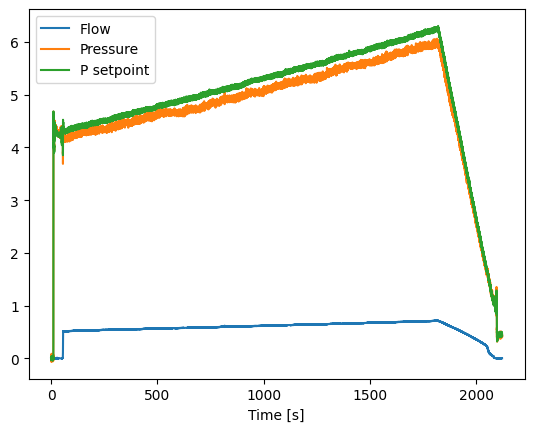

In [52]:
k =len(data[0])-1
flow = data[0][k]['AWM5-5'].values #SLPM
P = data[0][k]['SSCDP15-3'].values # Pa 
time = data[0][k]['Time']

plt.plot(time,flow, label = 'Flow')
plt.plot(time,P/1000, label = "Pressure")
plt.plot(time,data[0][k]['presFesto-1']*100,label ="P setpoint")
plt.legend()
plt.xlabel('Time [s]')

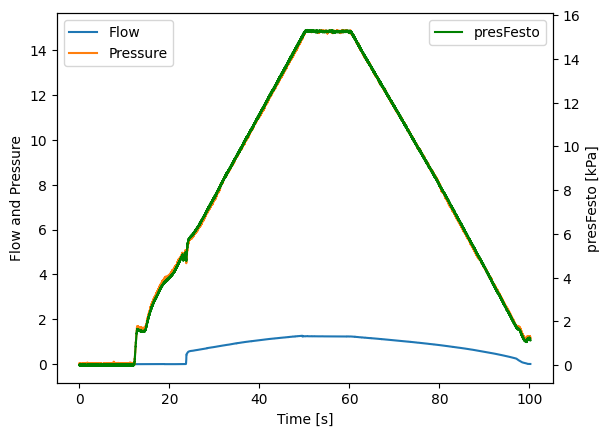

In [45]:
import matplotlib.pyplot as plt

k = 3
flow = data[0][k]['AWM5-5'].values  # SLPM
P = data[0][k]['SSCDP15-3'].values  # Pa
time = data[0][k]['Time']

fig, ax1 = plt.subplots()

# Plotting Flow and Pressure on the left y-axis
ax1.plot(time, flow, label='Flow')
ax1.plot(time, P/1000, label='Pressure')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Flow and Pressure')
ax1.legend(loc='upper left')

# Create a second y-axis to plot presFesto
ax2 = ax1.twinx()
ax2.plot(time, data[0][k]['presFesto-1']*100, 'g-', label='presFesto')
ax2.set_ylabel('presFesto [kPa]')
ax2.legend(loc='upper right')

plt.show()

In [13]:
plt.figure(figsize=[10, 5]) # Optional, set the size of the plot
linetypes = ['-', '--', '-.', ':'] # Define a list of linetypes

for i in range(len(data[0])):
    flow = data[0][i]['AWM20-12'].values #SLPM
    P = data[0][i]['MPX100-10'].values # Pa 
    time = data[0][i]['Time']

    # Select linetype using the modulo operator to loop through the linetypes list
    linetype = linetypes[i % len(linetypes)]

    plt.plot(time, P/1000,linetype,label="Pressure"+str(i))
    plt.xlabel('Time [s]')
    plt.ylabel('Pressure [kPa]')
    plt.legend(loc="upper left")

# Create a twin y-axis to plot the flow on the right side
ax2 = plt.gca().twinx()
for i in range(len(data[0])):
    flow = data[0][i]['AWM20-12'].values #SLPM
    time = data[0][i]['Time']

    # Select linetype using the modulo operator to loop through the linetypes list
    linetype = linetypes[i % len(linetypes)]
    
    ax2.plot(time, flow,linetype, color='r', label='Flow'+str(i))
    ax2.set_ylabel('Flow [SLPM]')
    ax2.legend(loc="upper right")

ax2.set_ylim(-0.5, 5)
plt.ylim(-0.5, 10)
plt.show()


KeyError: 'AWM20-12'

<Figure size 1000x500 with 0 Axes>

Text(0, 0.5, 'Flow [SLPM]')

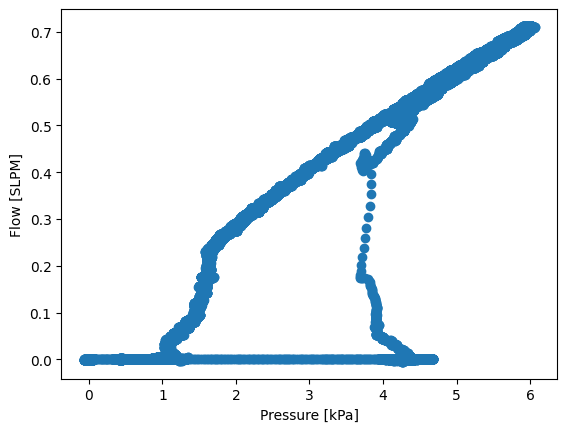

In [54]:
plt.scatter(P/1000,flow)
plt.xlabel('Pressure [kPa]')
plt.ylabel('Flow [SLPM]')
#plt.xlim(5,7)
#plt.ylim(-0.25, 1)




C:\Users\vaarkamp\AppData\Local\Temp\ipykernel_31624\2254766425.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')
C:\Users\vaarkamp\AppData\Local\Temp\ipykernel_31624\2254766425.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Time [s]')


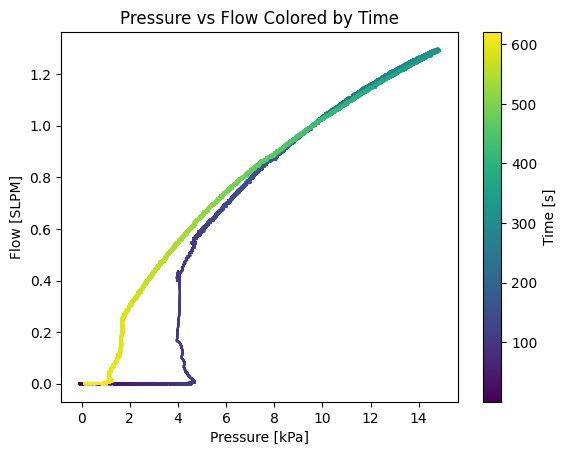

In [41]:
# Create a colormap
colormap = cm.get_cmap('viridis')

# Normalize the time variable to fit the colormap scale
norm_time = (time - time.min()) / (time.max() - time.min())

# Loop through and plot each segment with corresponding color
for i in range(len(time) - 1):
    plt.plot(P[i:i+10]/1000, flow[i:i+10], color=colormap(norm_time[i]))

# Add a colorbar to represent the time variable
sm = cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=time.min(), vmax=time.max()))
sm.set_array([])
plt.colorbar(sm, label='Time [s]')

plt.xlabel('Pressure [kPa]')
plt.ylabel('Flow [SLPM]')
plt.title('Pressure vs Flow Colored by Time')
#plt.xlim(5,7)
#plt.ylim(-0.25, 1)


save_plot('Pressure_vs_flow')
